In [5]:
import numpy as np 
import pandas as pd

import os
dir_black = os.path.join('../Black Soil')
dir_Cinder = os.path.join('../Cinder Soil')
dir_Laterite = os.path.join('../Laterite Soil')
dir_peat = os.path.join('../Peat Soil')
dir_yellow = os.path.join('../Yellow Soil')

In [6]:
import tensorflow as tf
from tensorflow import keras

In [7]:
image_size = 220
batch_size = 10


target_size = (image_size, image_size)
input_shape = (image_size, image_size, 3)

In [8]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(horizontal_flip=True,
                                   vertical_flip=True,
                                   rotation_range=50,
                                   rescale=1/255,
                                   validation_split=0.2)


train_generator = train_datagen.flow_from_directory(
        '', 
        target_size=(200, 200),
        batch_size = batch_size,
        classes = [ 'Black Soil','Cinder Soil', 'Laterite Soil','Peat Soil','Yellow Soil'],
       class_mode='categorical',subset='training')

validation_generator = train_datagen.flow_from_directory(
        '', 
        target_size=(200, 200),
        batch_size = batch_size,
        classes = [ 'Black Soil','Cinder Soil', 'Laterite Soil','Peat Soil','Yellow Soil'],
       class_mode='categorical',subset='validation')


Found 400 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


In [9]:
import PIL
for image_batch, label_batch in train_generator:
  break
  image_batch.shape, label_batch.shape

In [10]:
print (train_generator.class_indices)

{'Black Soil': 0, 'Cinder Soil': 1, 'Laterite Soil': 2, 'Peat Soil': 3, 'Yellow Soil': 4}


In [13]:
model = tf.keras.models.Sequential([
    
    # The first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(220, 220, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Flatten the results to feed into a dense layer
    tf.keras.layers.Flatten(),
    # 128 neuron in the fully-connected layer
    tf.keras.layers.Dense(128, activation='relu'),
    # 5 output neurons for 5 classes with the softmax activation
    tf.keras.layers.Dense(5, activation='softmax')
])

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 218, 218, 16)      448       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 109, 109, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 107, 107, 32)      4640      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 53, 53, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 51, 51, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 25, 25, 64)      

In [15]:
from keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [16]:
history = model.fit(
        train_generator, 
        steps_per_epoch = int(train_generator.samples/batch_size),  
        validation_data = validation_generator,
        validation_steps = int(validation_generator.samples/batch_size),
        epochs =40,
        verbose = 1,
        )

Epoch 1/40
40/40 [==============================] - 68s 2s/step - loss: 1.4323 - accuracy: 0.3325 - val_loss: 1.0408 - val_accuracy: 0.5300
Epoch 2/40
40/40 [==============================] - 28s 697ms/step - loss: 1.0112 - accuracy: 0.6375 - val_loss: 0.8203 - val_accuracy: 0.7900
Epoch 3/40
40/40 [==============================] - 28s 708ms/step - loss: 0.7950 - accuracy: 0.7375 - val_loss: 0.5107 - val_accuracy: 0.8300
Epoch 4/40
40/40 [==============================] - 29s 709ms/step - loss: 0.6340 - accuracy: 0.7925 - val_loss: 0.5523 - val_accuracy: 0.7700
Epoch 5/40
40/40 [==============================] - 28s 701ms/step - loss: 0.5625 - accuracy: 0.8075 - val_loss: 0.3826 - val_accuracy: 0.8600
Epoch 6/40
40/40 [==============================] - 28s 711ms/step - loss: 0.5282 - accuracy: 0.8475 - val_loss: 0.5935 - val_accuracy: 0.7700
Epoch 7/40
40/40 [==============================] - 28s 704ms/step - loss: 0.4588 - accuracy: 0.8475 - val_loss: 0.5219 - val_accuracy: 0.8200
Ep

In [17]:
import matplotlib.pyplot as plt


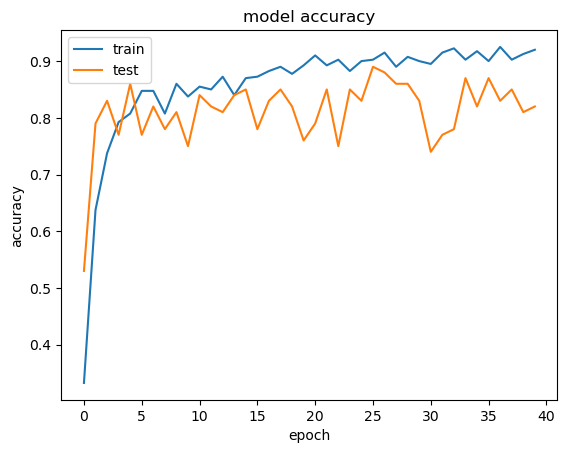

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#plt.savefig('modelAccuracy')

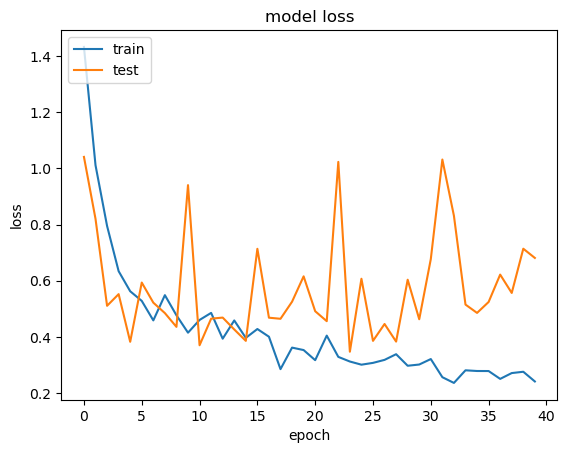

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#plt.savefig('modelLoss.png')

In [25]:
model.save('SoilPredictor2.h5')

In [15]:
#from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
"""
#Confution Matrix and Classification Report
num_of_test_samples = 100

Y_pred = model.predict(validation_generator, num_of_test_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
#print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = list(validation_generator.class_indices.keys())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))
"""


In [23]:
model.evaluate(validation_generator)

10/10 [==============================] - 4s 360ms/step - loss: 0.6961 - accuracy: 0.8100


[0.6960592865943909, 0.8100000023841858]